# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('/content/drive/MyDrive/finalproj-organizedData.sqlite3')

query = """
SELECT * FROM StoryHeaders
WHERE StoryHeaders.language = 1
AND StoryHeaders.title IS NOT NULL
AND StoryHeaders.description IS NOT NULL;
"""

# Turn it to dataframe
df = pd.read_sql_query(query, conn)

conn.close()

In [ ]:
df = df.query('description != ""')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
# Drop rows where the year is smaller than 1999
df = df[df['year'] >= 1999]

In [ ]:
df.shape

(210593, 20)

In [ ]:
df.head(15)

,id,processDate,rating,finished,title,description,curChapters,maxChapters,language,words,hits,kudos,comments,bookmarks,date,restricted,headerScrapedFrom,contentScrapedFrom,hidden,year
0,42,2020-07-29 21:38:01,-1,1,You can't put back a petal when it falls from ...,Cristina gets a haircut. Meredith gets a revel...,1,1,1,2578,3490,239,6,30,2008-07-14,0,26262435,26262435,0,2008
1,63,2020-07-29 21:35:52,2,1,The Education of Rodney McKay,Sometimes life just seemed to happen to Rodney...,1,1,1,2260,1436,96,4,11,2008-09-16,0,26262449,26262449,0,2008
2,84,2020-07-29 21:38:01,0,1,Black Pearl,Black pearls are rare and precious—sometimes e...,1,1,1,1145,883,9,2,1,2008-09-16,0,26262466,26262466,0,2008
3,168,2020-07-29 21:38:02,0,1,Ring Out the Bells (The Fatherland Remix),"She was flushed from exertion, a riot of tangl...",1,1,1,797,418,4,1,0,2008-09-17,0,26262511,26262511,0,2008
4,210,2020-07-29 21:38:02,1,1,Things to Come,"""How the hell did you get in here?"" Matt asked...",1,1,1,1911,3101,129,0,6,2008-09-17,0,26262536,26262536,0,2008
5,252,2020-07-29 21:38:02,1,1,Childhood Treasures,"""She isn't quite sure what they're waiting for...",1,1,1,1094,2942,201,21,27,2005-12-15,0,26262573,26262573,0,2005
6,273,2020-07-29 21:38:02,1,1,pitch black,One hundred and seventeen words of funny naugh...,1,1,1,118,1179,63,2,0,2005-11-09,0,26262594,26262594,0,2005
7,294,2020-07-29 21:38:02,0,1,Resurrection in Ten Parts,John comes back from the dead.,1,1,1,1603,1290,27,2,6,2008-09-17,0,26262612,26262612,0,2008
8,336,2020-07-29 21:38:02,3,1,Nobody's Birthday,In which there are seasons and bicycles and re...,1,1,1,5090,263,7,0,0,2008-09-17,0,26262646,26262646,0,2008
9,357,2020-07-29 21:38:02,1,1,Expatriates,This is the beginning of a beautiful friendshi...,1,1,1,1145,597,17,3,3,2007-10-13,0,26262665,26262665,0,2007


# EDA

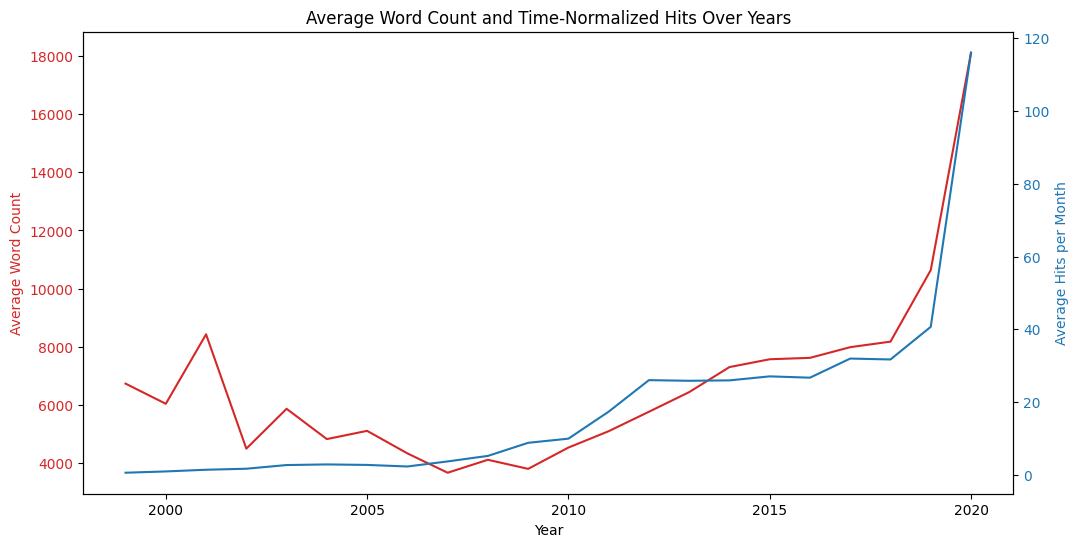

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# Convert the 'date' column to datetime and calculate the 'age' of the fanfiction in months
df['date'] = pd.to_datetime(df['date'])
current_date = datetime.now()
df['age_months'] = ((current_date.year - df['date'].dt.year) * 12 +
                    current_date.month - df['date'].dt.month)

# Calculate hits per month as a new column
df['hits_per_month'] = df['hits'] / df['age_months']

# Calculate average word count and average hits per month for each year
df['year'] = df['date'].dt.year
summary = df.groupby('year').agg({
    'words': 'mean',
    'hits_per_month': 'mean'
}).reset_index()

# Plot average word count and hits per month over the years
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Word Count', color=color)
ax1.plot(summary['year'], summary['words'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Average Hits per Month', color=color)
ax2.plot(summary['year'], summary['hits_per_month'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Word Count and Time-Normalized Hits Over Years')
plt.show()

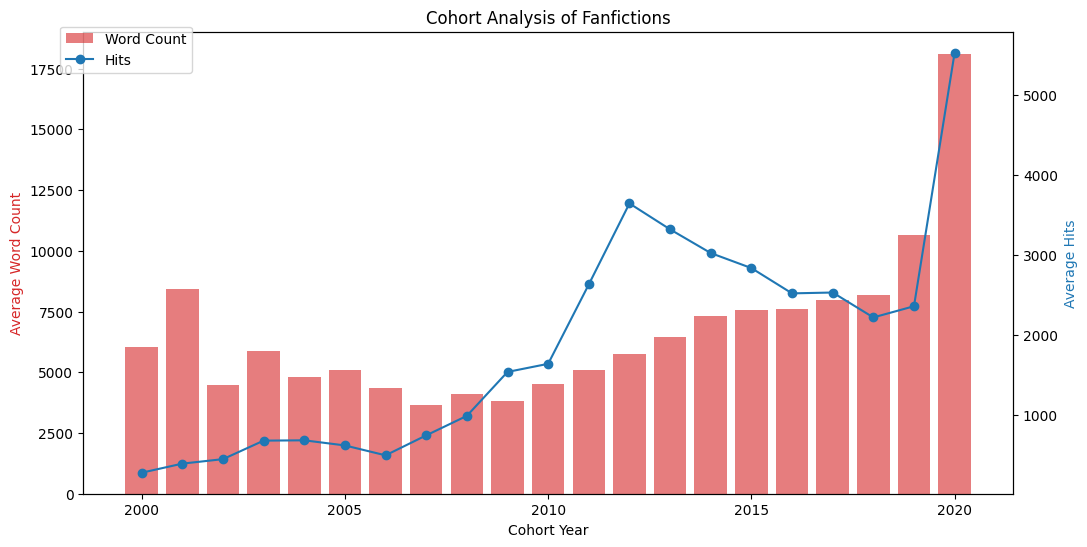

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date to create cohorts
df['cohort'] = df['date'].dt.year

# Filter out data outside of the desired range (2000-2020)
df = df[(df['cohort'] >= 2000) & (df['cohort'] <= 2020)]

# Calculate the average word count and hits for each cohort
cohort_analysis = df.groupby('cohort').agg({
    'words': 'mean',
    'hits': 'mean'
}).reset_index()

# Plotting the cohort analysis
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Cohort Year')
ax1.set_ylabel('Average Word Count', color=color)
ax1.bar(cohort_analysis['cohort'], cohort_analysis['words'], color=color, alpha=0.6, label='Word Count')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Hits', color=color)
ax2.plot(cohort_analysis['cohort'], cohort_analysis['hits'], color=color, marker='o', label='Hits')

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.title('Cohort Analysis of Fanfictions')
plt.show()

<ipython-input-13-cac8dde7da9c>:10: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(coefficients_df['Year'], coefficients_df['WordCountCoefficient'], 6)


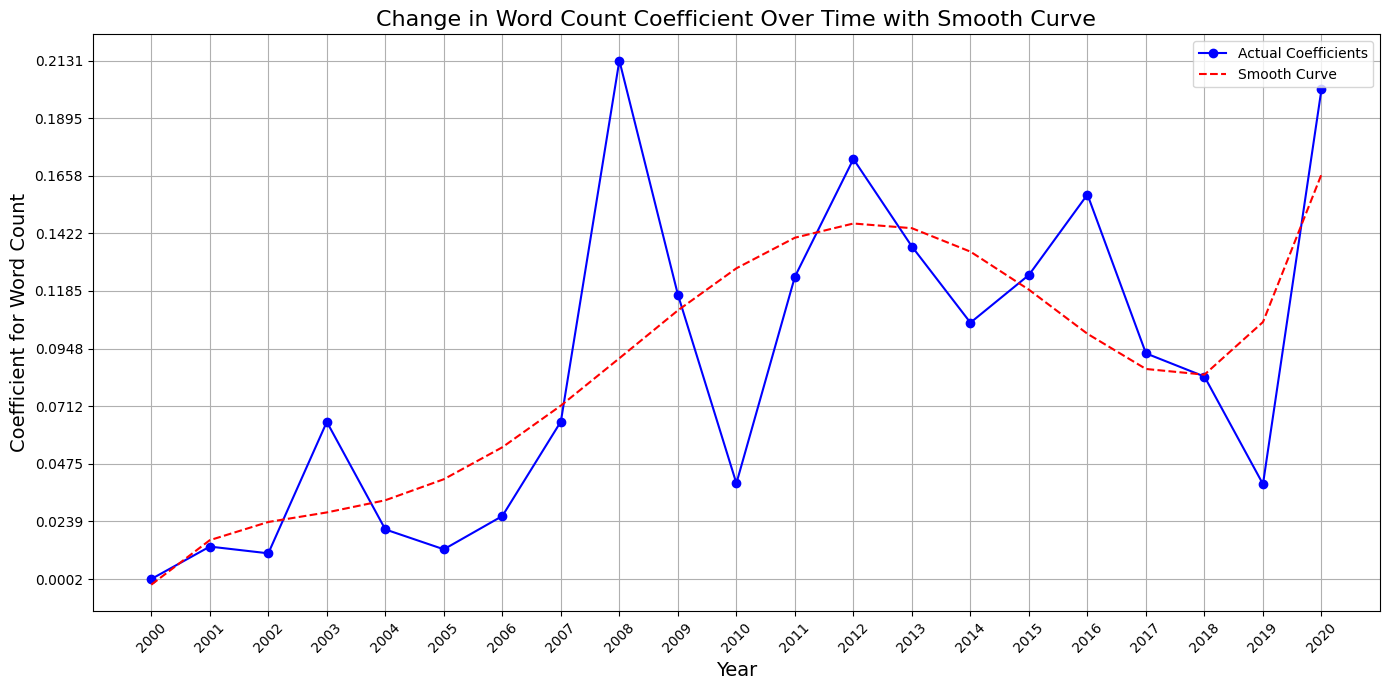

In [ ]:
coefficients_df.sort_values(by='Year', inplace=True)

# Fit a polynomial curve of degree 3 to the data
z = np.polyfit(coefficients_df['Year'], coefficients_df['WordCountCoefficient'], 6)
p = np.poly1d(z)

# Plot the coefficients and the smooth curve
plt.figure(figsize=(14, 7))
plt.plot(coefficients_df['Year'], coefficients_df['WordCountCoefficient'], marker='o', linestyle='-', color='blue', label='Actual Coefficients')
plt.plot(coefficients_df['Year'], p(coefficients_df['Year']), linestyle='--', color='red', label='Smooth Curve')

# Improving the plot with titles and labels
plt.title('Change in Word Count Coefficient Over Time with Smooth Curve', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Coefficient for Word Count', fontsize=14)
plt.xticks(coefficients_df['Year'], rotation=45)
plt.yticks(np.linspace(min(coefficients_df['WordCountCoefficient']), max(coefficients_df['WordCountCoefficient']), 10))
plt.legend()
plt.grid(True)

# Save the figure
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd


# Define a threshold for reporting p-values
threshold = 0.001

# Apply the threshold to the p-values
p_values_df['WordCountPValue'] = p_values_df['WordCountPValue'].apply(lambda x: '<{:.3g}'.format(threshold) if x < threshold else '{:.3g}'.format(x))

p_values_df

,Year,WordCountPValue
0,2008,<0.001
1,2005,<0.001
2,2007,<0.001
3,2003,<0.001
4,2006,<0.001
5,2004,0.0837
6,2000,0.981
7,2002,0.0536
8,2009,<0.001
9,2001,0.0263


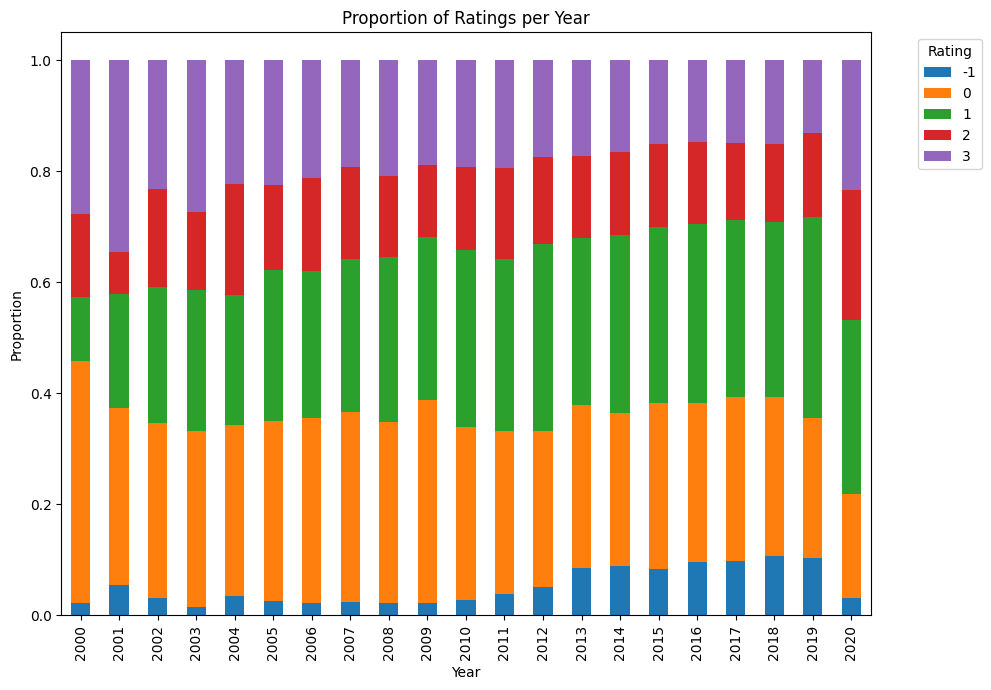

In [ ]:
# Add a 'year' column to the dataframe
df['year'] = df['date'].dt.year

# Group by year and rating to count the number of occurrences of each rating
rating_counts = df.groupby(['year', 'rating']).size().unstack(fill_value=0)

# Calculate the proportion of each rating per year
rating_proportions = rating_counts.div(rating_counts.sum(axis=1), axis=0)

# Plot the proportion of ratings per year
ax = rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 7))
ax.set_title('Proportion of Ratings per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()